# UNIVARIATE CASE

## A. Generate 20 real number for the variable X from the uniform distribution U [0,1].

In [165]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
# uniform distribution of 20 real number
X_train=np.random.uniform(0,1,20)
X_train

array([0.67195745, 0.04289145, 0.1503577 , 0.77157553, 0.45596203,
       0.26550644, 0.82437213, 0.10442141, 0.02366936, 0.92281034,
       0.24356314, 0.27218842, 0.11954118, 0.16264063, 0.06444714,
       0.80955697, 0.09563333, 0.96745635, 0.74095862, 0.70168094])

## B. Construct the training set T = { ($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{20}$, $y_{20}$)} using the relation :

##$Y_{i}$  = sin(2 π $x_{i}$) + $ε_{i}$ where $ε_{i}$ ~ N(0,0.25)


In [167]:
Y_train =[]

for x_val in X_train:
    Yi = math.sin(2 * math.pi * x_val) + np.random.uniform(0, 0.25) 
    Y_train.append(Yi)

# For better understanding, let's convert X and Y training dataset into a dataframe
df_train = pd.DataFrame(data=(X_train,Y_train),index=['X_train','Y_train'])
df_train = df_train.T
df_train

,X_train,Y_train
0,0.671957,-0.658106
1,0.042891,0.353877
2,0.150358,0.810473
3,0.771576,-0.771949
4,0.455962,0.497825
5,0.265506,1.030222
6,0.824372,-0.864806
7,0.104421,0.802584
8,0.023669,0.358926
9,0.922810,-0.375278


## C. In the similar way construct a testing set of size 50, i.e. Test = { ($x'_{1}$, $y'_{1}$), ($x'_{2}$, $y'_{2}$), ... , ($x'_{50}$, $y'_{50}$)}

In [168]:
X_test = np.random.uniform(0,1,50)
Y_test = []

for i in X_test:
    Yi = math.sin(2 *math.pi*i) + np.random.uniform(0,0.25) 
    Y_test.append(Yi)

# For better understanding, let's convert X and Y testing dataset into a dataframe
df_test = pd.DataFrame(data=(X_test,Y_test),index=['X_test','Y_test'])
df_test = df_test.T
df_test

,X_test,Y_test
0,0.776774,-0.960312
1,0.597355,-0.335641
2,0.666151,-0.851912
3,0.743014,-0.795204
4,0.785016,-0.857787
5,0.534406,-0.087258
6,0.712154,-0.899187
7,0.252467,1.096377
8,0.277697,1.051244
9,0.783550,-0.740621


## D. Estimate the Regularized Least Squared Polynomial Regression model of order M= 1, 2, 3, 9 using the training set T.


## Example
## 1. For M=1 , we need to estimate F(x) = $β_{1}$x +  $β_{0}$
## 2. For M = 2,  F(x) =  $β_{2}$ $x^{2}$ +  $β_{1}$x +  $β_{0}$

### In the previous assignment, we observed that, as our value of the coefficients increases, this result in the problem  of overfitting. Overfitting occurs when the trained model performs well on the training data and performs poorly on the testing dataset. This can be taken care of by following steps :

### 1. By increasing the training dataset. 
### 2. Regularization methods that will apply a penalizing term (reducing the weights and biases) to overcome overfitting.

### For order m=1

In [169]:
# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_1 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 1))
LSP_ord_1

array([[ 1.00186776, -1.91229507]])

In [170]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_test['X_test'])
y_predicted_m1 = []

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += LSP_ord_1[0][deg] * math.pow(val, deg)
  y_predicted_m1.append(y_val)

df_predicted_m1 = pd.DataFrame(data=(X, y_predicted_m1),index=['X', 'Y_predicted']).T
df_predicted_m1

,X,Y_predicted
0,0.776774,-0.483553
1,0.597355,-0.140451
2,0.666151,-0.272009
3,0.743014,-0.418994
4,0.785016,-0.499314
5,0.534406,-0.020075
6,0.712154,-0.359981
7,0.252467,0.519076
8,0.277697,0.470829
9,0.783550,-0.496512


Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

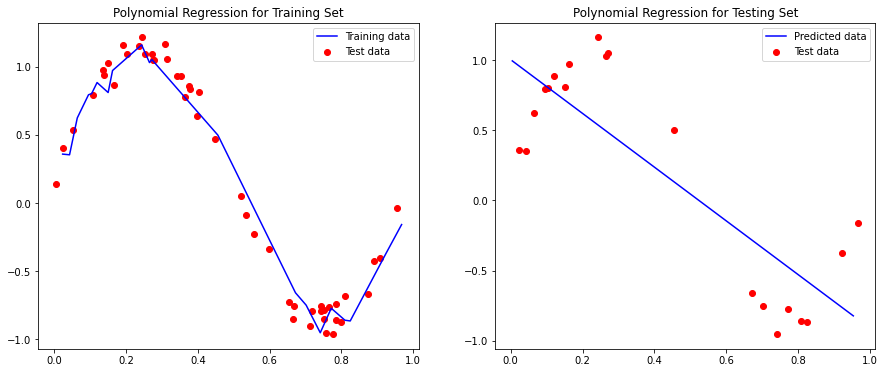

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort = df_predicted_m1.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='blue')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='red')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='red')
axes[1].plot(df_pred_sort['X'], df_pred_sort['Y_predicted'], color='blue')
axes[1].legend(['Predicted data', 'Test data'])
axes[1].set_title('Polynomial Regression for Testing Set')

In [172]:
y_vs_y_hat_m1 = pd.DataFrame(data=(y_predicted_m1,Y_test),index=['y_predicted_m1','Y_train'])
y_vs_y_hat_m1 = y_vs_y_hat_m1.T
y_vs_y_hat_m1

,y_predicted_m1,Y_train
0,-0.483553,-0.960312
1,-0.140451,-0.335641
2,-0.272009,-0.851912
3,-0.418994,-0.795204
4,-0.499314,-0.857787
5,-0.020075,-0.087258
6,-0.359981,-0.899187
7,0.519076,1.096377
8,0.470829,1.051244
9,-0.496512,-0.740621


In [173]:
ssr_m1 = []
for itr in range(len(y_vs_y_hat_m1)):
  ssr_i = (y_vs_y_hat_m1['y_predicted_m1'].iloc[itr] - y_vs_y_hat_m1['Y_train'].iloc[itr])**2
  ssr_m1.append(ssr_i)
ssr_m1

[0.2272995569681743,
 0.03809919921131216,
 0.3362880186386016,
 0.14153427117958386,
 0.12850303986594705,
 0.004513485386886734,
 0.29074286095620133,
 0.33327623016405106,
 0.3368815244717582,
 0.05958963047426368,
 0.01942395501388415,
 0.31440591782621063,
 0.3665244133927741,
 0.17284738312535317,
 0.3420161600061506,
 0.0021432019466616453,
 0.1211457579484001,
 0.32742545872366935,
 0.15795899339760744,
 0.10728755851142542,
 0.22750479728255957,
 0.22202500076443504,
 0.36436295251501805,
 0.3378976591736181,
 0.17641351281457557,
 0.4625423692906333,
 0.376594232853144,
 1.8092981357677743e-06,
 0.13618439730674556,
 0.07571782599399124,
 0.23313139638507693,
 0.05348499781217204,
 0.22775515358412513,
 0.10859495776662148,
 0.09268535521402174,
 0.33251254467489966,
 0.5737104576247566,
 0.04115089908863028,
 0.111405391421129,
 0.026375127287000217,
 0.6126128604504796,
 0.7225089686735606,
 0.2520453600311535,
 0.4290761831124529,
 0.034313953266565896,
 0.2703655007788574

In [174]:
regular_m1 =[]
for Lambda in range(1,6):
  result = y_vs_y_hat_m1 + ((Lambda/2) * np.sum(LSP_ord_1**2))
  regular_m1.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}\n: {regular_m1[itr]}\n\n')

RMSE for lambda = 1
:     y_predicted_m1   Y_train
0         1.846753  1.369993
1         2.189855  1.994665
2         2.058297  1.478393
3         1.911312  1.535102
4         1.830992  1.472519
5         2.310231  2.243048
6         1.970324  1.431118
7         2.849382  3.426682
8         2.801135  3.381550
9         1.833794  1.589684
10        1.785631  1.646261
11        2.607973  3.168693
12        2.658521  3.263934
13        1.896988  1.481239
14        2.676071  3.260892
15        2.339017  2.385312
16        1.805890  1.457830
17        2.616003  3.188214
18        2.573021  2.970461
19        2.474555  2.802103
20        2.080249  1.603274
21        2.636600  3.107795
22        2.881982  3.485607
23        2.560950  3.142240
24        1.961272  1.541256
25        2.864639  3.544744
26        2.810357  3.424030
27        1.659506  1.660851
28        3.233695  2.864664
29        1.630657  1.905826
30        2.056027  1.573191
31        3.072728  3.303996
32        2.943196  3

### For order m=2

In [175]:
# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_2 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 2))
LSP_ord_2

array([[ 0.90989648, -1.13411967, -0.82379817]])

In [176]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_test['X_test'])
y_predicted_m2 = []

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += LSP_ord_2[0][deg] * math.pow(val, deg)
  y_predicted_m2.append(y_val)

df_predicted_m2 = pd.DataFrame(data=(X, y_predicted_m2),index=['X', 'Y_predicted']).T
df_predicted_m2

,X,Y_predicted
0,0.776774,-0.468119
1,0.597355,-0.061534
2,0.666151,-0.211164
3,0.743014,-0.387564
4,0.785016,-0.488071
5,0.534406,0.068547
6,0.712154,-0.315572
7,0.252467,0.571060
8,0.277697,0.531427
9,0.783550,-0.484515


Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

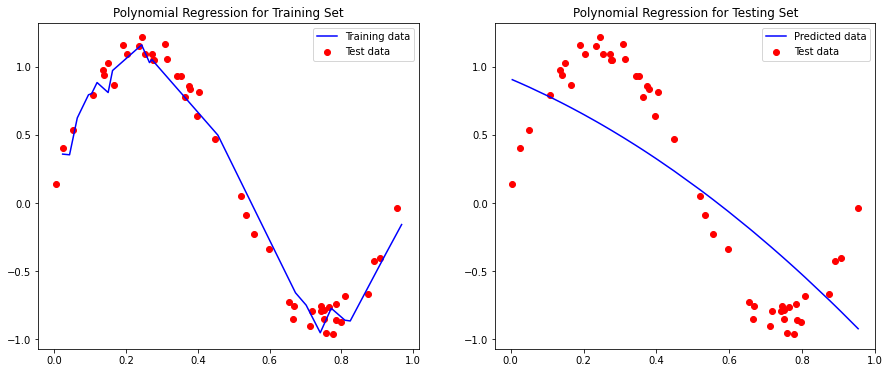

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort = df_predicted_m2.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='blue')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='red')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_test['X_test'], df_test['Y_test'], color='red')
axes[1].plot(df_pred_sort['X'], df_pred_sort['Y_predicted'], color='blue')
axes[1].legend(['Predicted data', 'Test data'])
axes[1].set_title('Polynomial Regression for Testing Set')

In [178]:
y_vs_y_hat_m2 = pd.DataFrame(data=(y_predicted_m2,Y_test),index=['y_predicted_m2','Y_train'])
y_vs_y_hat_m2 = y_vs_y_hat_m2.T
y_vs_y_hat_m2

,y_predicted_m2,Y_train
0,-0.468119,-0.960312
1,-0.061534,-0.335641
2,-0.211164,-0.851912
3,-0.387564,-0.795204
4,-0.488071,-0.857787
5,0.068547,-0.087258
6,-0.315572,-0.899187
7,0.571060,1.096377
8,0.531427,1.051244
9,-0.484515,-0.740621


In [179]:
ssr_m2 = []
for itr in range(len(y_vs_y_hat_m2)):
  ssr_i = (y_vs_y_hat_m2['y_predicted_m2'].iloc[itr] - y_vs_y_hat_m2['Y_train'].iloc[itr])**2
  ssr_m2.append(ssr_i)
ssr_m2

[0.2422540647610233,
 0.07513493324422282,
 0.41055834371163274,
 0.1661706811915917,
 0.13669029103368457,
 0.024275019784729398,
 0.34060631747645764,
 0.27595790100848755,
 0.2702097374991921,
 0.06559050578182056,
 0.019024219123623898,
 0.22670755423773958,
 0.2761331677403411,
 0.19695152249328518,
 0.25682285998206855,
 0.0019080020059485346,
 0.12418455144047641,
 0.23842922263539315,
 0.0962960466665179,
 0.055798564765350125,
 0.2930891142515773,
 0.1514046702326146,
 0.3114256989559554,
 0.24345795462973502,
 0.2139396738157051,
 0.39824083437851115,
 0.3076257906535368,
 0.0018428499980430813,
 0.09919333047558876,
 0.10689043152168551,
 0.29517649053287487,
 0.05420804884549879,
 0.19802979660899844,
 0.1549728176332532,
 0.10613448690392036,
 0.2671489563073749,
 0.4730452633086229,
 0.040853525151059424,
 0.13294488862579473,
 0.06173079389618828,
 0.7779563762023842,
 0.5798706206418244,
 0.2773418082617666,
 0.3407881832571738,
 0.02906009218301608,
 0.2431951434627043

In [180]:
regular_m2 =[]
for Lambda in range(1,6):
  result = ssr_m2 + ((Lambda/2) * np.sum(LSP_ord_2**2))
  regular_m2.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m2[itr]}\n\n')

RMSE for lambda = 1: [1.63864529 1.47152616 1.80694957 1.56256191 1.53308152 1.42066625
 1.73699755 1.67234913 1.66660097 1.46198173 1.41541545 1.62309878
 1.6725244  1.59334275 1.65321409 1.39829923 1.52057578 1.63482045
 1.49268728 1.45218979 1.68948034 1.5477959  1.70781693 1.63984918
 1.6103309  1.79463206 1.70401702 1.39823408 1.49558456 1.50328166
 1.69156772 1.45059928 1.59442103 1.55136405 1.50252572 1.66354019
 1.86943649 1.43724475 1.52933612 1.45812202 2.17434761 1.97626185
 1.67373304 1.73717941 1.42545132 1.63958637 1.49064768 1.54056722
 1.39654748 1.62215348]


RMSE for lambda = 2: [3.03503652 2.86791739 3.2033408  2.95895314 2.92947275 2.81705748
 3.13338878 3.06874036 3.0629922  2.85837296 2.81180668 3.01949001
 3.06891563 2.98973398 3.04960532 2.79469046 2.91696701 3.03121168
 2.8890785  2.84858102 3.08587157 2.94418713 3.10420816 3.03624041
 3.00672213 3.19102329 3.10040825 2.79462531 2.89197579 2.89967289
 3.08795895 2.84699051 2.99081225 2.94775528 2.89891694 3.059

### For order m=3

In [181]:
# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_3 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 3))
LSP_ord_3

array([[ 2.68775723e-03,  1.09237878e+01, -3.19185492e+01,
         2.11689229e+01]])

In [182]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_test['X_test'])
y_predicted_m3 = []

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += LSP_ord_3[0][deg] * math.pow(val, deg)
  y_predicted_m3.append(y_val)

df_predicted_m3 = pd.DataFrame(data=(X, y_predicted_m3),index=['X', 'Y_predicted']).T
df_predicted_m3

,X,Y_predicted
0,0.776774,-0.849318
1,0.597355,-0.349241
2,0.666151,-0.626774
3,0.743014,-0.818653
4,0.785016,-0.850964
5,0.534406,-0.044368
6,0.712154,-0.760054
7,0.252467,1.066762
8,0.277697,1.028100
9,0.783550,-0.850848


Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

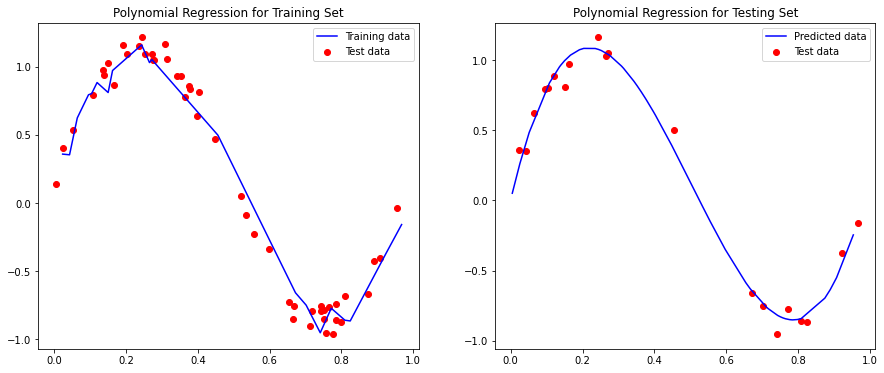

In [183]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort = df_predicted_m3.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='blue')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='red')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='red')
axes[1].plot(df_pred_sort['X'], df_pred_sort['Y_predicted'], color='blue')
axes[1].legend(['Predicted data', 'Test data'])
axes[1].set_title('Polynomial Regression for Testing Set')

In [184]:
y_vs_y_hat_m3 = pd.DataFrame(data=(y_predicted_m3,Y_test),index=['y_predicted_m3','Y_train'])
y_vs_y_hat_m3 = y_vs_y_hat_m3.T
y_vs_y_hat_m3

,y_predicted_m3,Y_train
0,-0.849318,-0.960312
1,-0.349241,-0.335641
2,-0.626774,-0.851912
3,-0.818653,-0.795204
4,-0.850964,-0.857787
5,-0.044368,-0.087258
6,-0.760054,-0.899187
7,1.066762,1.096377
8,1.028100,1.051244
9,-0.850848,-0.740621


In [185]:
ssr_m3 = []
for itr in range(len(y_vs_y_hat_m3)):
  ssr_i = (y_vs_y_hat_m3['y_predicted_m3'].iloc[itr] - y_vs_y_hat_m3['Y_train'].iloc[itr])**2
  ssr_m3.append(ssr_i)
ssr_m3

[0.012319653864791343,
 0.00018496748628250243,
 0.0506874173496808,
 0.0005498437156813889,
 4.6550930660009296e-05,
 0.0018394889594144925,
 0.01935811457336811,
 0.0008770549658129905,
 0.0005356595584029954,
 0.012149850607574822,
 0.024903859805214836,
 0.016064886645471246,
 0.014005843404429152,
 0.00041754312106692725,
 0.006776984490335481,
 0.0005246252757780766,
 0.0005736131383563821,
 0.016643642623504255,
 4.5606508085253066e-05,
 0.006459014191158173,
 0.019839113159580115,
 3.197507305030063e-05,
 0.0054375666029305705,
 0.04269641646669191,
 0.000333724840365372,
 0.019477657884483544,
 0.0032223742725703613,
 0.0007180139851564357,
 0.002588771650541551,
 0.04447555646537257,
 0.015951120542659375,
 0.0005571961709128903,
 6.27354456124566e-05,
 0.021448561895805716,
 0.00603374818434278,
 0.00037936199864853105,
 0.0452814457673043,
 0.0007090965873812141,
 0.004257183972143942,
 0.005176509663977851,
 0.04250436428637585,
 0.008554821393193602,
 0.01271961176877988,

In [186]:
regular_m3 =[]
for Lambda in range(1,6):
  result = ssr_m3 + ((Lambda/2) * np.sum(LSP_ord_3**2))
  regular_m3.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m3[itr]}\n\n')

RMSE for lambda = 1: [793.13543264 793.12329796 793.17380041 793.12366283 793.12315954
 793.12495248 793.1424711  793.12399004 793.12364865 793.13526284
 793.14801685 793.13917787 793.13711883 793.12353053 793.12988997
 793.12363761 793.1236866  793.13975663 793.12315859 793.129572
 793.1429521  793.12314496 793.12855055 793.1658094  793.12344671
 793.14259065 793.12633536 793.123831   793.12570176 793.16758854
 793.13906411 793.12367018 793.12317572 793.14456155 793.12914674
 793.12349235 793.16839443 793.12382208 793.12737017 793.1282895
 793.16561735 793.13166781 793.1358326  793.13651849 793.15058398
 793.13000636 793.12421567 793.12497771 793.12526124 793.14395734]


RMSE for lambda = 2: [1586.25854563 1586.24641094 1586.29691339 1586.24677582 1586.24627253
 1586.24806546 1586.26558409 1586.24710303 1586.24676164 1586.25837583
 1586.27112984 1586.26229086 1586.26023182 1586.24664352 1586.25300296
 1586.2467506  1586.24679959 1586.26286962 1586.24627158 1586.25268499
 1586.26606509

### For order m=9

In [187]:
# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_9 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 9))
LSP_ord_9

array([[ 1.72860968e-01,  5.13886617e+00,  6.36442221e+01,
        -9.75276260e+02,  5.77910771e+03, -1.86105260e+04,
         3.43940142e+04, -3.64171970e+04,  2.05735679e+04,
        -4.81297906e+03]])

In [188]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_train['X_train'])
y_predicted_m9 = []

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += LSP_ord_9[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)

df_predicted_m9 = pd.DataFrame(data=(X,y_predicted_m9),index=['X','Y_predicted']).T
df_predicted_m9

,X,Y_predicted
0,0.671957,-0.679158
1,0.042891,0.450466
2,0.150358,0.932038
3,0.771576,-0.870535
4,0.455962,0.501191
5,0.265506,1.071662
6,0.824372,-0.841353
7,0.104421,0.788982
8,0.023669,0.318899
9,0.922810,-0.376248


Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

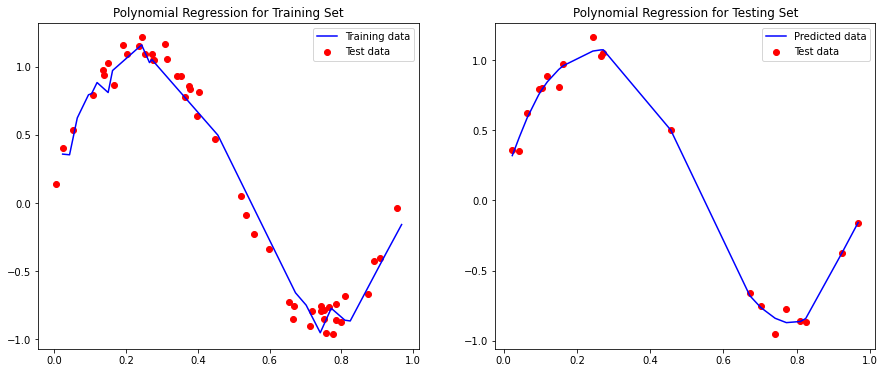

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort = df_predicted_m9.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='blue')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='red')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='red')
axes[1].plot(df_pred_sort['X'], df_pred_sort['Y_predicted'], color='blue')
axes[1].legend(['Predicted data', 'Test data'])
axes[1].set_title('Polynomial Regression for Testing Set')

In [190]:
y_vs_y_hat_m9 = pd.DataFrame(data=(y_predicted_m9,Y_train),index=['y_predicted_m9','Y_train'])
y_vs_y_hat_m9 = y_vs_y_hat_m9.T
y_vs_y_hat_m9

,y_predicted_m9,Y_train
0,-0.679158,-0.658106
1,0.450466,0.353877
2,0.932038,0.810473
3,-0.870535,-0.771949
4,0.501191,0.497825
5,1.071662,1.030222
6,-0.841353,-0.864806
7,0.788982,0.802584
8,0.318899,0.358926
9,-0.376248,-0.375278


In [191]:
ssr_m9 = []
for itr in range(len(y_vs_y_hat_m9)):
  ssr_i = (y_vs_y_hat_m9['y_predicted_m9'].iloc[itr] - y_vs_y_hat_m9['Y_train'].iloc[itr])**2
  ssr_m9.append(ssr_i)
ssr_m9

[0.0004431739898893275,
 0.009329376756079356,
 0.014778153332553768,
 0.009719154385431647,
 1.1328666479561832e-05,
 0.0017172799576471755,
 0.0005500779718642933,
 0.0001850201665885343,
 0.0016021236757234102,
 9.397340359365482e-07,
 0.009376300541492088,
 0.00040218970101705236,
 0.0015141484789111014,
 0.00017213278229460748,
 0.0012799435899174803,
 1.0518942214201199e-05,
 0.00178506946097713,
 7.546686428183432e-14,
 0.012484340520460413,
 0.00018998826822951294]

In [192]:
regular_m9 =[]
for Lambda in range(1,6):
  result = ssr_m9 + ((Lambda/2) * np.sum(LSP_ord_9**2))
  regular_m9.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m9[itr]}\n\n')

RMSE for lambda = 1: [1.66815096e+09 1.66815096e+09 1.66815096e+09 1.66815096e+09
 1.66815096e+09 1.66815096e+09 1.66815096e+09 1.66815096e+09
 1.66815096e+09 1.66815096e+09 1.66815096e+09 1.66815096e+09
 1.66815096e+09 1.66815096e+09 1.66815096e+09 1.66815096e+09
 1.66815096e+09 1.66815096e+09 1.66815096e+09 1.66815096e+09]


RMSE for lambda = 2: [3.33630192e+09 3.33630192e+09 3.33630192e+09 3.33630192e+09
 3.33630192e+09 3.33630192e+09 3.33630192e+09 3.33630192e+09
 3.33630192e+09 3.33630192e+09 3.33630192e+09 3.33630192e+09
 3.33630192e+09 3.33630192e+09 3.33630192e+09 3.33630192e+09
 3.33630192e+09 3.33630192e+09 3.33630192e+09 3.33630192e+09]


RMSE for lambda = 3: [5.00445288e+09 5.00445288e+09 5.00445288e+09 5.00445288e+09
 5.00445288e+09 5.00445288e+09 5.00445288e+09 5.00445288e+09
 5.00445288e+09 5.00445288e+09 5.00445288e+09 5.00445288e+09
 5.00445288e+09 5.00445288e+09 5.00445288e+09 5.00445288e+09
 5.00445288e+09 5.00445288e+09 5.00445288e+09 5.00445288e+09]


RMSE for lamb